# Imports

In [332]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [333]:
ROOT_PATH = Path().resolve().parent
ROOT_PATH


PosixPath('/home/sviperm/Documents/GitHub/freshflow-test-assignment')

In [334]:
df = pd.read_csv(ROOT_PATH / 'data' / 'data.csv', index_col=0)
df = (df.assign(day=pd.to_datetime(df['day']))
      .rename(columns={'day': 'timestamp', 'item_name': 'segment', 'sales_quantity': 'target'})
      .drop(columns=['item_number'])
      .drop_duplicates()
      .fillna(0))
df


,timestamp,segment,purchase_price,suggested_retail_price,orders_quantity,target,revenue
0,2022-02-09,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2,2022-02-09,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
4,2022-02-09,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.84
6,2022-02-08,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,10.0,14.0,20.71
8,2022-02-08,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,9.89
...,...,...,...,...,...,...,...
1868,2021-04-04,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,0.0,0.00
1870,2021-04-04,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,0.00
1872,2021-04-03,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1874,2021-04-03,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98


In [335]:
df['segment'].unique()


array(['ROMA TOMATEN ES I 500G SF', 'SL MANDARINEN BEH.ES I 750G GS',
       'UH ZWIEBELN DE-HE I 1KG GS'], dtype=object)

# Exploratory Data Analysis

The first step in any data analysis is to perform an exploratory data analysis (EDA). This allows us to get a better understanding of the data we are working with and to identify any patterns or trends that may exist within it.

In [336]:
df.describe()


,purchase_price,suggested_retail_price,orders_quantity,target,revenue
count,939.000000,939.000000,939.000000,939.000000,939.000000
mean,1.216796,1.941402,8.602769,8.235357,10.457082
std,0.568281,0.936906,14.985951,11.514012,14.027006
min,0.520000,0.660000,0.000000,0.000000,0.000000
25%,0.674928,1.055314,0.000000,0.000000,0.000000
50%,0.978451,1.546338,0.000000,0.000000,0.000000
75%,1.991321,3.216415,18.000000,15.000000,18.960000
max,2.150000,3.490000,144.000000,85.000000,93.520000


In [337]:
from etna.datasets.tsdataset import TSDataset


In [338]:
tsdf = TSDataset.to_dataset(df)
tsdf


segment    ROMA TOMATEN ES I 500G SF                         \
feature              orders_quantity purchase_price revenue   
timestamp                                                     
2021-04-03                      40.0       0.978451   25.33   
2021-04-04                       0.0       0.978451    0.00   
2021-04-05                       0.0       0.978451    0.00   
2021-04-06                       0.0       0.990000   26.82   
2021-04-07                      10.0       0.990000    7.45   
...                              ...            ...     ...   
2022-02-05                      20.0       0.920000   26.82   
2022-02-06                       0.0       0.978451    0.00   
2022-02-07                      10.0       0.920000   11.74   
2022-02-08                      10.0       0.920000   20.71   
2022-02-09                       0.0       0.920000   23.55   

segment                                  SL MANDARINEN BEH.ES I 750G GS  \
feature    suggested_retail_price target                orders_quantity   
timestamp                                                                 
2021-04-03               1.546338   17.0                            0.0   
2021-04-04               1.546338    0.0                            0.0   
2021-04-05               1.546338    0.0                            0.0   
2021-04-06               1.490000   18.0                            0.0   
2021-04-07               1.490000    5.0                            0.0   
...                           ...    ...                            ...   
2022-02-05               1.490000   18.0                           70.0   
2022-02-06               1.546338    0.0                            0.0   
2022-02-07               1.490000    8.0                            0.0   
2022-02-08               1.490000   14.0                            0.0   
2022-02-09               1.490000   16.0                            0.0   

segment                                                          \
feature    purchase_price revenue suggested_retail_price target   
timestamp                                                         
2021-04-03       1.991321    5.98               3.216415    2.0   
2021-04-04       1.991321    0.00               3.216415    0.0   
2021-04-05       1.991321    0.00               3.216415    0.0   
2021-04-06       1.920000    2.99               2.990000    1.0   
2021-04-07       1.920000    0.00               2.990000    0.0   
...                   ...     ...                    ...    ...   
2022-02-05       1.500000   72.00               2.490000   29.0   
2022-02-06       1.991321    0.00               3.216415    0.0   
2022-02-07       2.050000   20.51               3.490000    6.0   
2022-02-08       2.050000    9.89               3.490000    3.0   
2022-02-09       2.050000   10.47               3.490000    3.0   

segment    UH ZWIEBELN DE-HE I 1KG GS                         \
feature               orders_quantity purchase_price revenue   
timestamp                                                      
2021-04-03                        0.0       0.674928   22.77   
2021-04-04                        0.0       0.674928    0.00   
2021-04-05                        0.0       0.674928    0.00   
2021-04-06                        0.0       0.610000   20.54   
2021-04-07                        0.0       0.610000   15.01   
...                               ...            ...     ...   
2022-02-05                       54.0       0.600000   21.27   
2022-02-06                        0.0       0.674928    0.00   
2022-02-07                        0.0       0.640000    9.77   
2022-02-08                       18.0       0.640000   17.66   
2022-02-09                        0.0       0.640000   12.84   

segment                                   
feature    suggested_retail_price target  
timestamp                                 
2021-04-03               1.055314   23.0  
2021-04-04               1.055314    0.0  
2021-04-05     

In [339]:
ts = TSDataset(tsdf, freq="D")
ts


segment    ROMA TOMATEN ES I 500G SF                         \
feature              orders_quantity purchase_price revenue   
timestamp                                                     
2021-04-03                      40.0       0.978451   25.33   
2021-04-04                       0.0       0.978451    0.00   
2021-04-05                       0.0       0.978451    0.00   
2021-04-06                       0.0       0.990000   26.82   
2021-04-07                      10.0       0.990000    7.45   
...                              ...            ...     ...   
2022-02-05                      20.0       0.920000   26.82   
2022-02-06                       0.0       0.978451    0.00   
2022-02-07                      10.0       0.920000   11.74   
2022-02-08                      10.0       0.920000   20.71   
2022-02-09                       0.0       0.920000   23.55   

segment                                  SL MANDARINEN BEH.ES I 750G GS  \
feature    suggested_retail_price target                orders_quantity   
timestamp                                                                 
2021-04-03               1.546338   17.0                            0.0   
2021-04-04               1.546338    0.0                            0.0   
2021-04-05               1.546338    0.0                            0.0   
2021-04-06               1.490000   18.0                            0.0   
2021-04-07               1.490000    5.0                            0.0   
...                           ...    ...                            ...   
2022-02-05               1.490000   18.0                           70.0   
2022-02-06               1.546338    0.0                            0.0   
2022-02-07               1.490000    8.0                            0.0   
2022-02-08               1.490000   14.0                            0.0   
2022-02-09               1.490000   16.0                            0.0   

segment                                                          \
feature    purchase_price revenue suggested_retail_price target   
timestamp                                                         
2021-04-03       1.991321    5.98               3.216415    2.0   
2021-04-04       1.991321    0.00               3.216415    0.0   
2021-04-05       1.991321    0.00               3.216415    0.0   
2021-04-06       1.920000    2.99               2.990000    1.0   
2021-04-07       1.920000    0.00               2.990000    0.0   
...                   ...     ...                    ...    ...   
2022-02-05       1.500000   72.00               2.490000   29.0   
2022-02-06       1.991321    0.00               3.216415    0.0   
2022-02-07       2.050000   20.51               3.490000    6.0   
2022-02-08       2.050000    9.89               3.490000    3.0   
2022-02-09       2.050000   10.47               3.490000    3.0   

segment    UH ZWIEBELN DE-HE I 1KG GS                         \
feature               orders_quantity purchase_price revenue   
timestamp                                                      
2021-04-03                        0.0       0.674928   22.77   
2021-04-04                        0.0       0.674928    0.00   
2021-04-05                        0.0       0.674928    0.00   
2021-04-06                        0.0       0.610000   20.54   
2021-04-07                        0.0       0.610000   15.01   
...                               ...            ...     ...   
2022-02-05                       54.0       0.600000   21.27   
2022-02-06                        0.0       0.674928    0.00   
2022-02-07                        0.0       0.640000    9.77   
2022-02-08                       18.0       0.640000   17.66   
2022-02-09                        0.0       0.640000   12.84   

segment                                   
feature    suggested_retail_price target  
timestamp                                 
2021-04-03               1.055314   23.0  
2021-04-04               1.055314    0.0  
2021-04-05     

In [340]:
ts.describe()


,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
ROMA TOMATEN ES I 500G SF,2021-04-03,2022-02-09,313,0,3,4,0,0,D
SL MANDARINEN BEH.ES I 750G GS,2021-04-03,2022-02-09,313,0,3,4,0,0,D
UH ZWIEBELN DE-HE I 1KG GS,2021-04-03,2022-02-09,313,0,3,4,0,0,D


In [341]:
from etna.analysis import (
    cross_corr_plot,
    distribution_plot,
    acf_plot,
    plot_correlation_matrix,
)


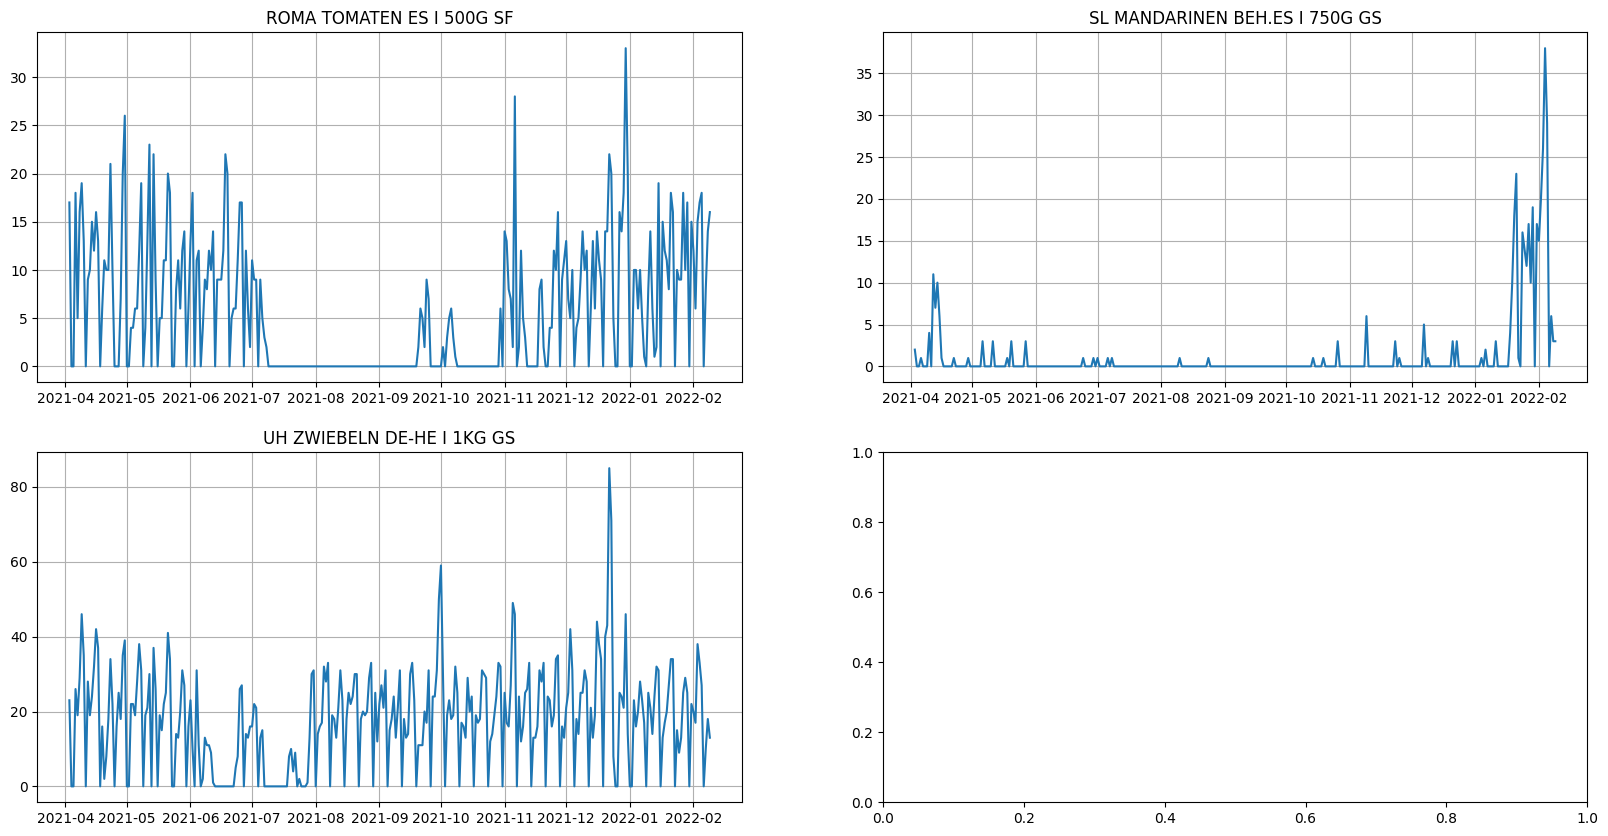

In [342]:
ts.plot()


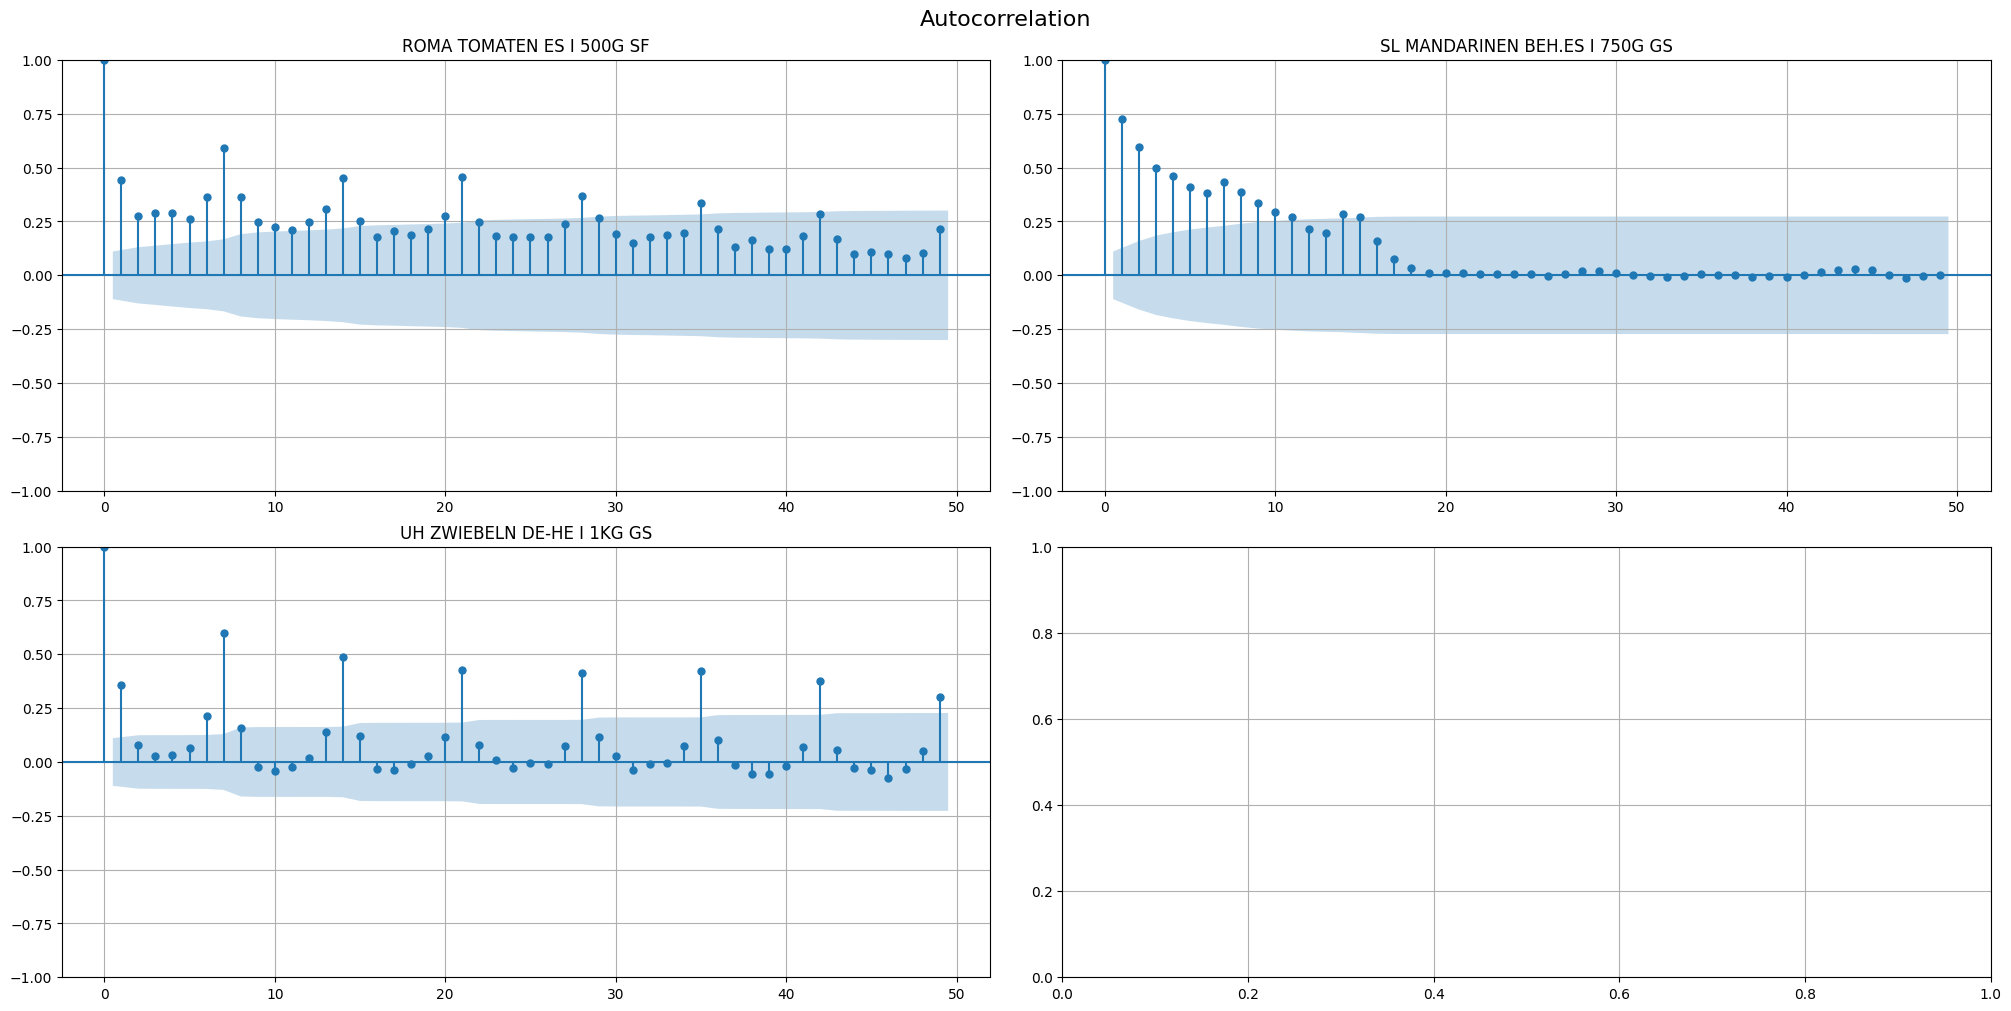

In [343]:
acf_plot(ts, lags=49)


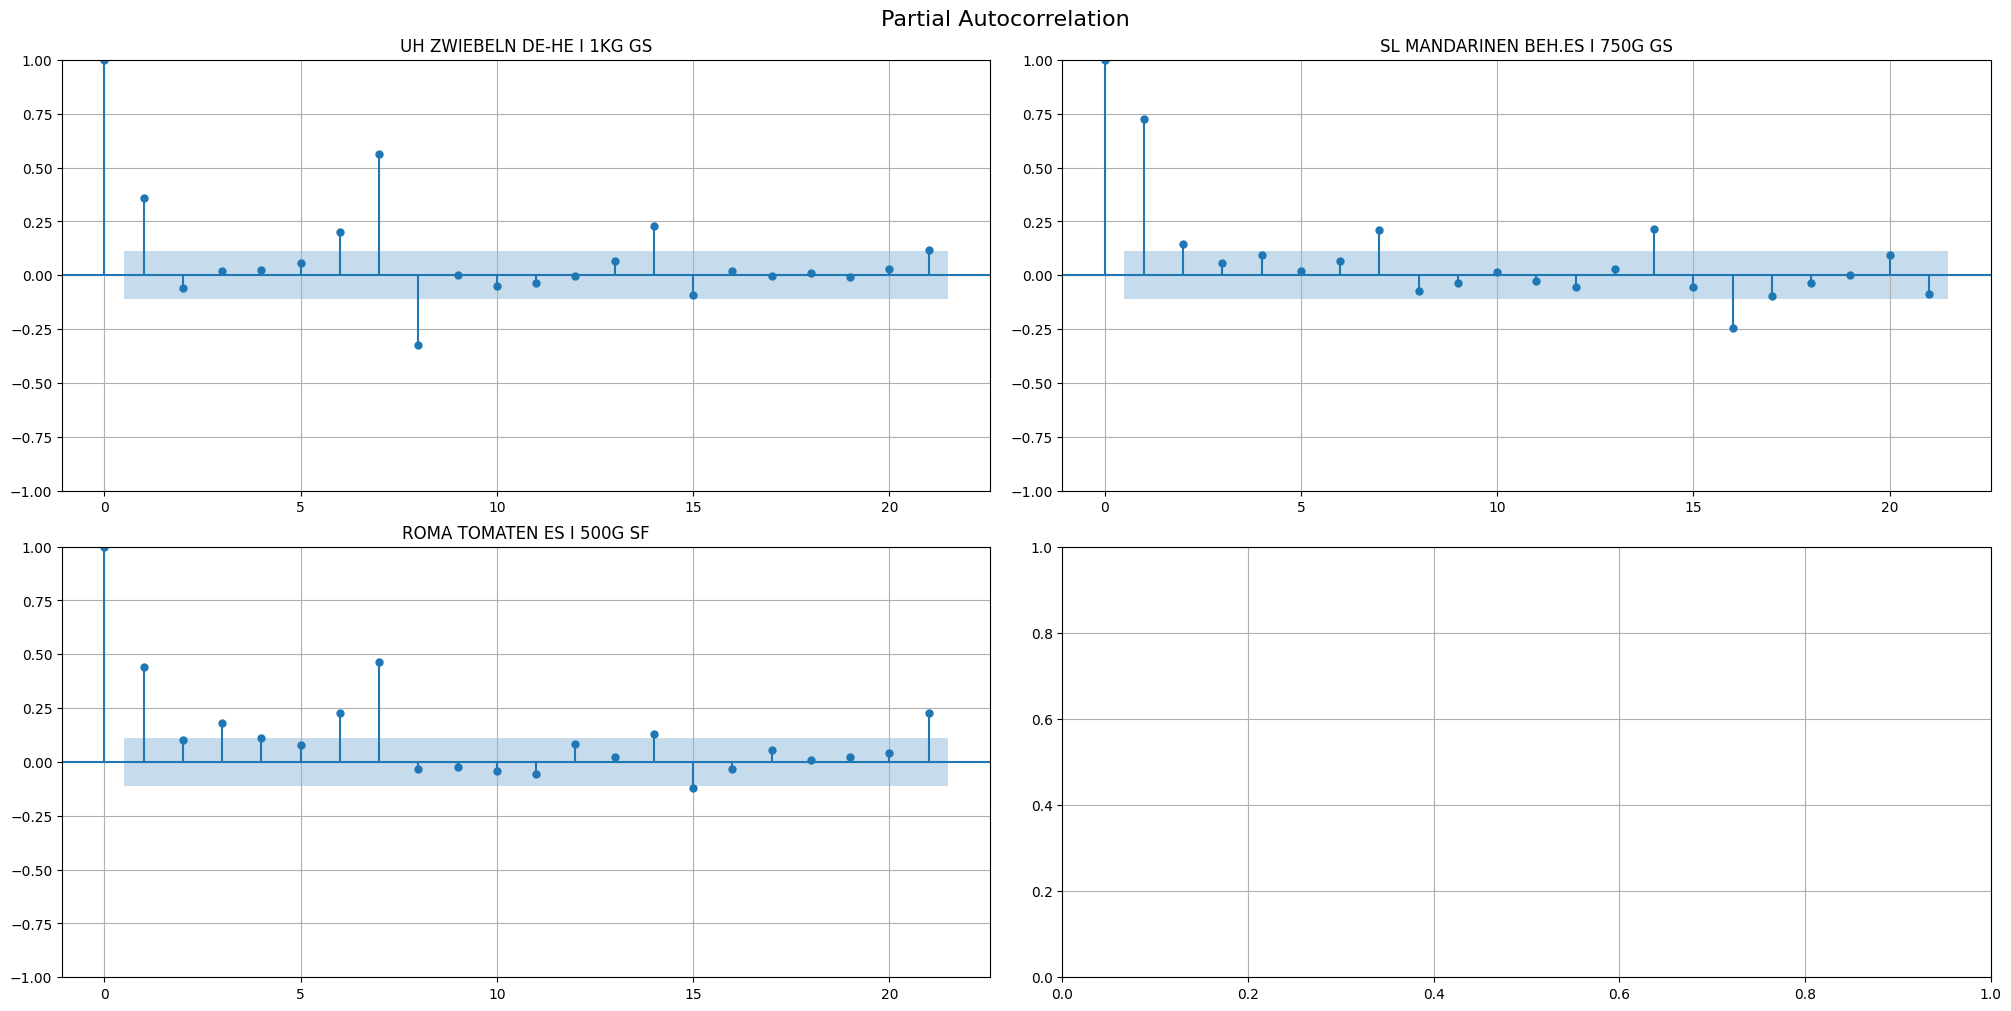

In [344]:
acf_plot(ts, lags=21, partial=True)


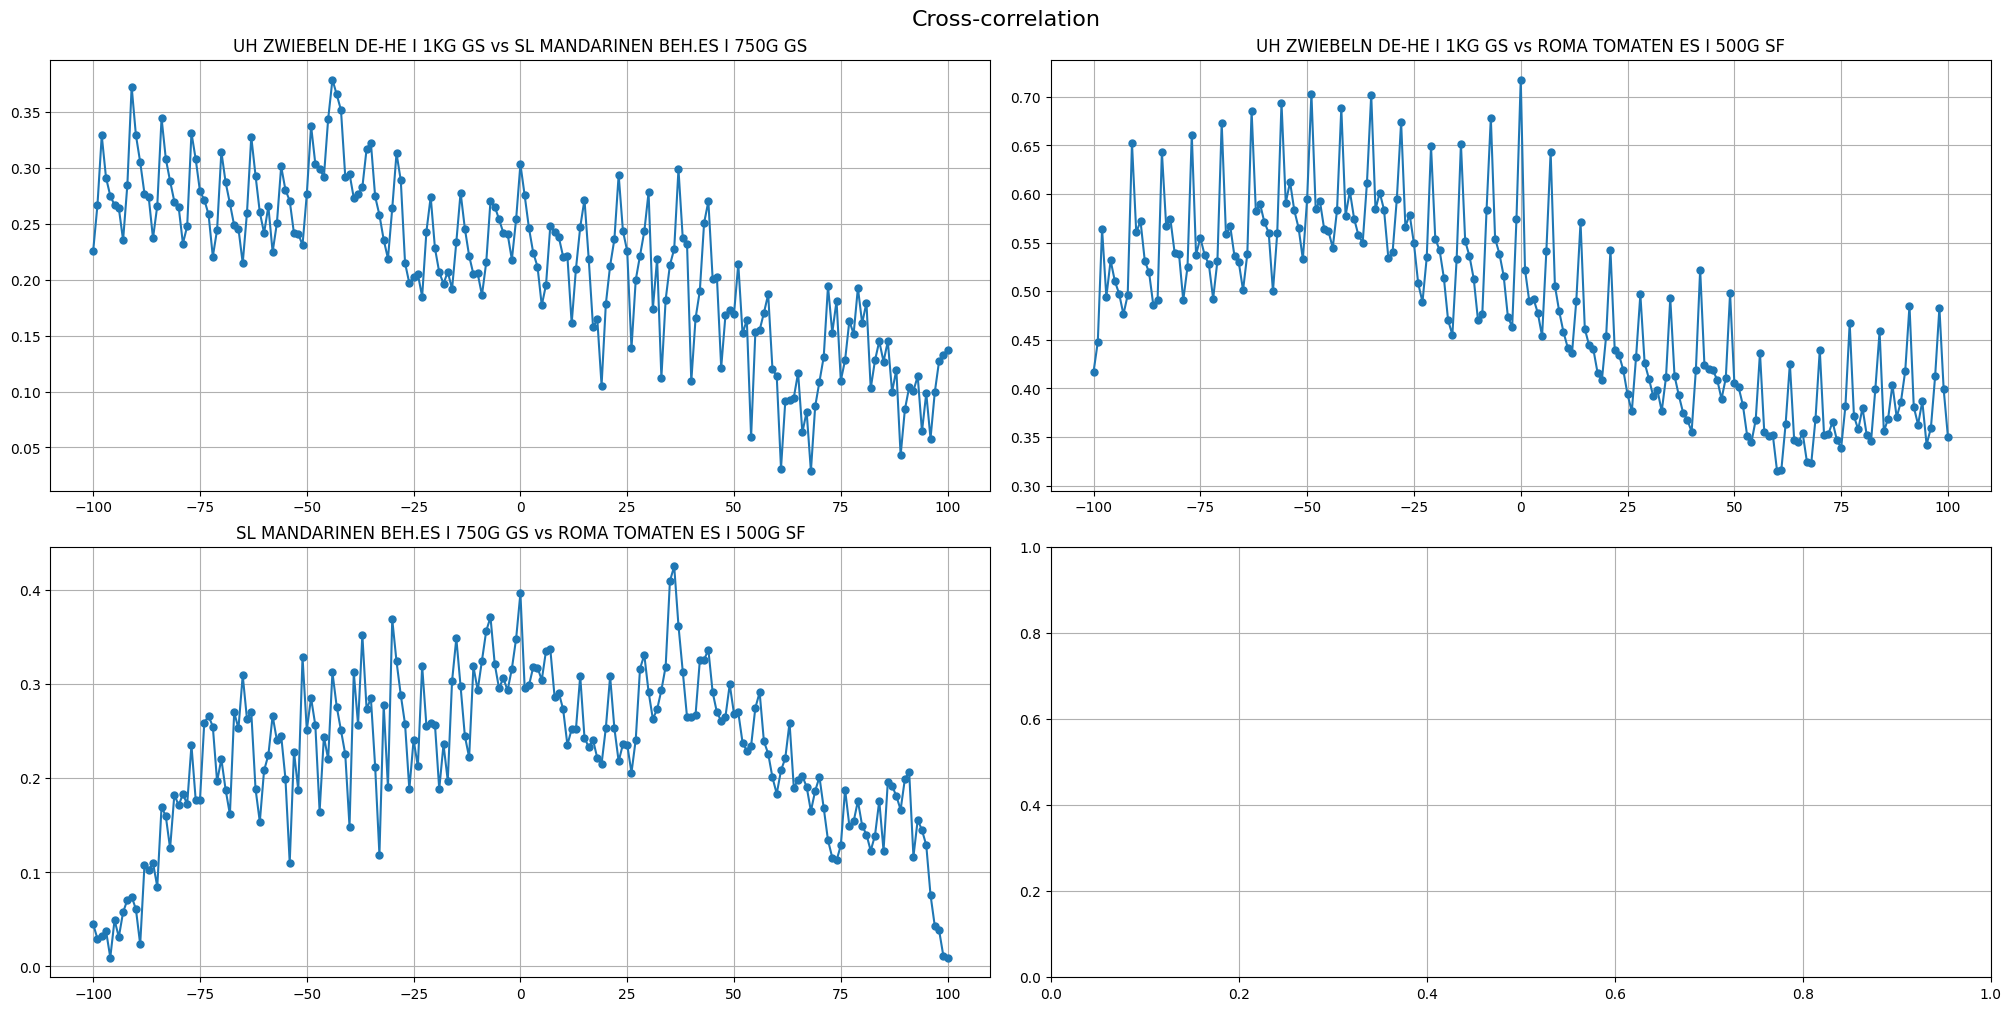

In [345]:
cross_corr_plot(ts, maxlags=100)


In [346]:
from etna.analysis import plot_trend
from etna.transforms import LinearTrendTransform


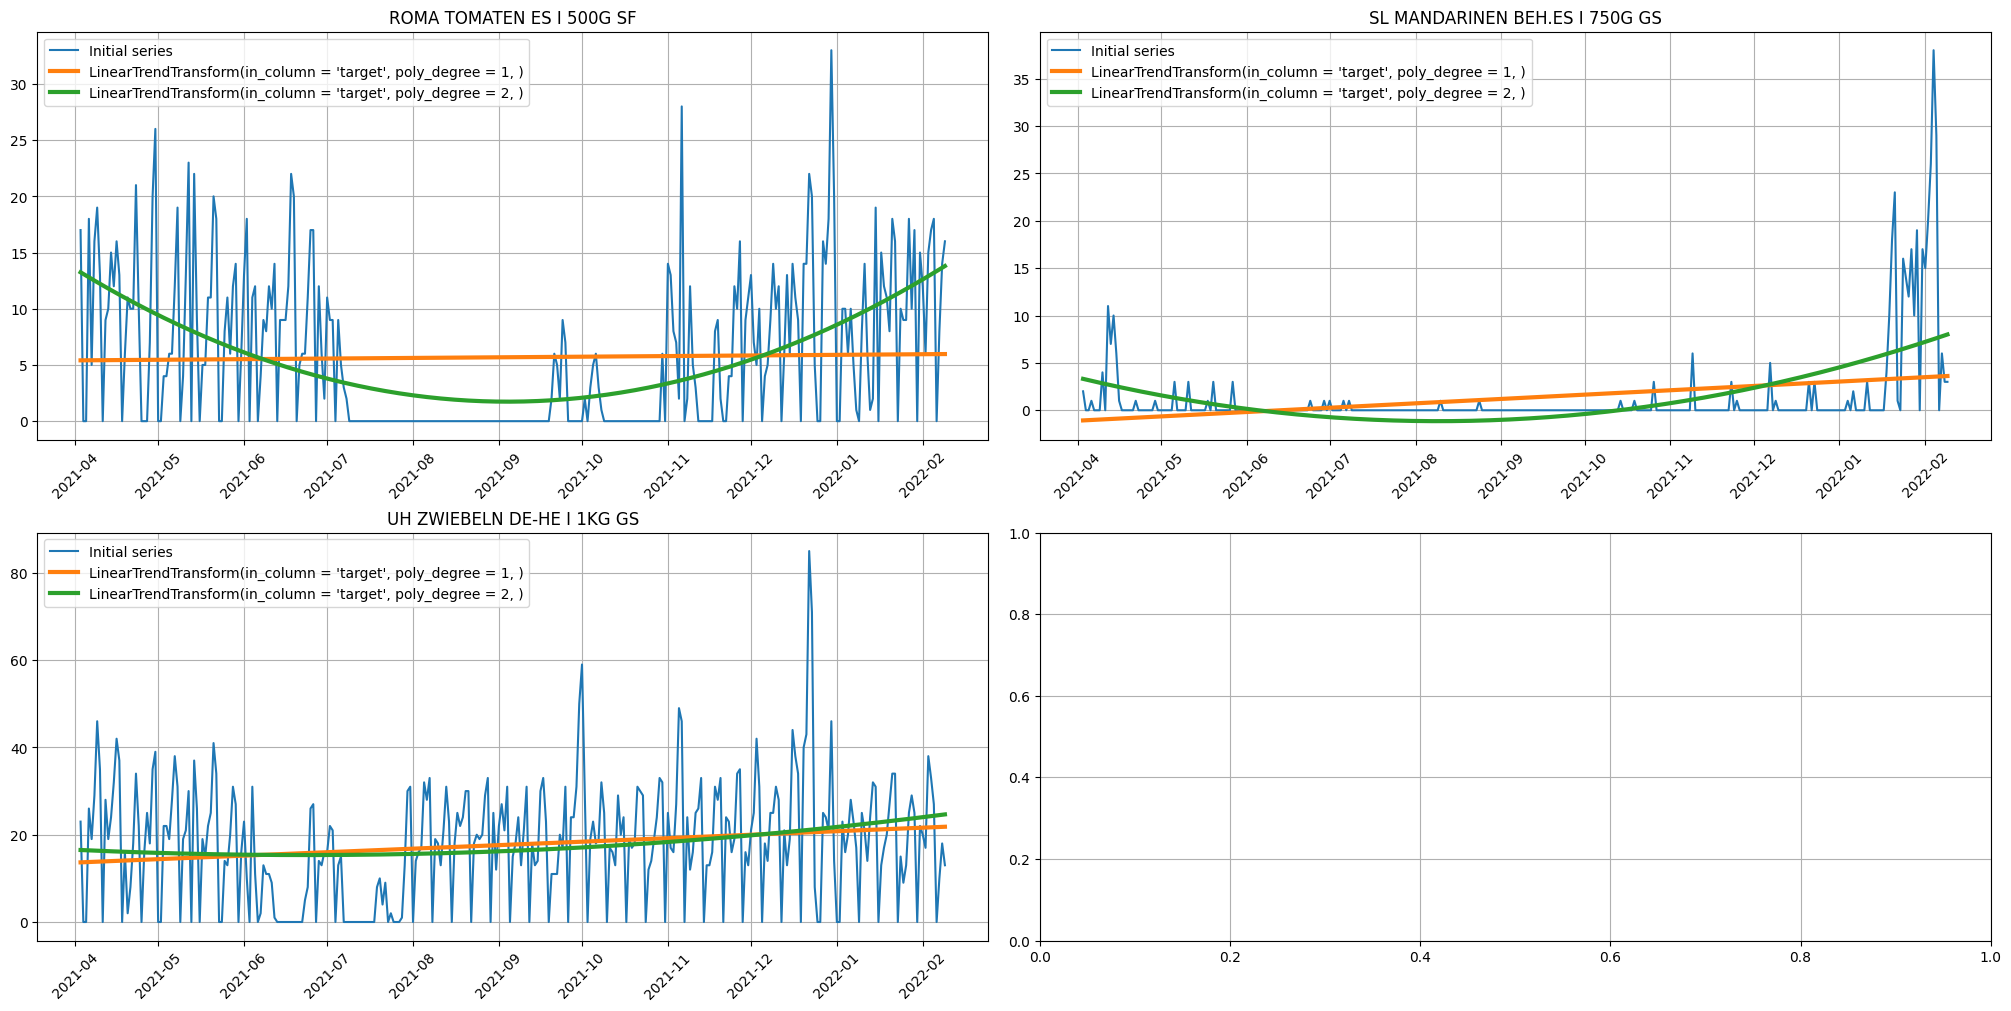

In [347]:
trends = [
    LinearTrendTransform(in_column="target", poly_degree=1),
    LinearTrendTransform(in_column="target", poly_degree=2),
]

plot_trend(ts, trend_transform=trends)


In [348]:
from etna.analysis import plot_periodogram, stl_plot, seasonal_plot


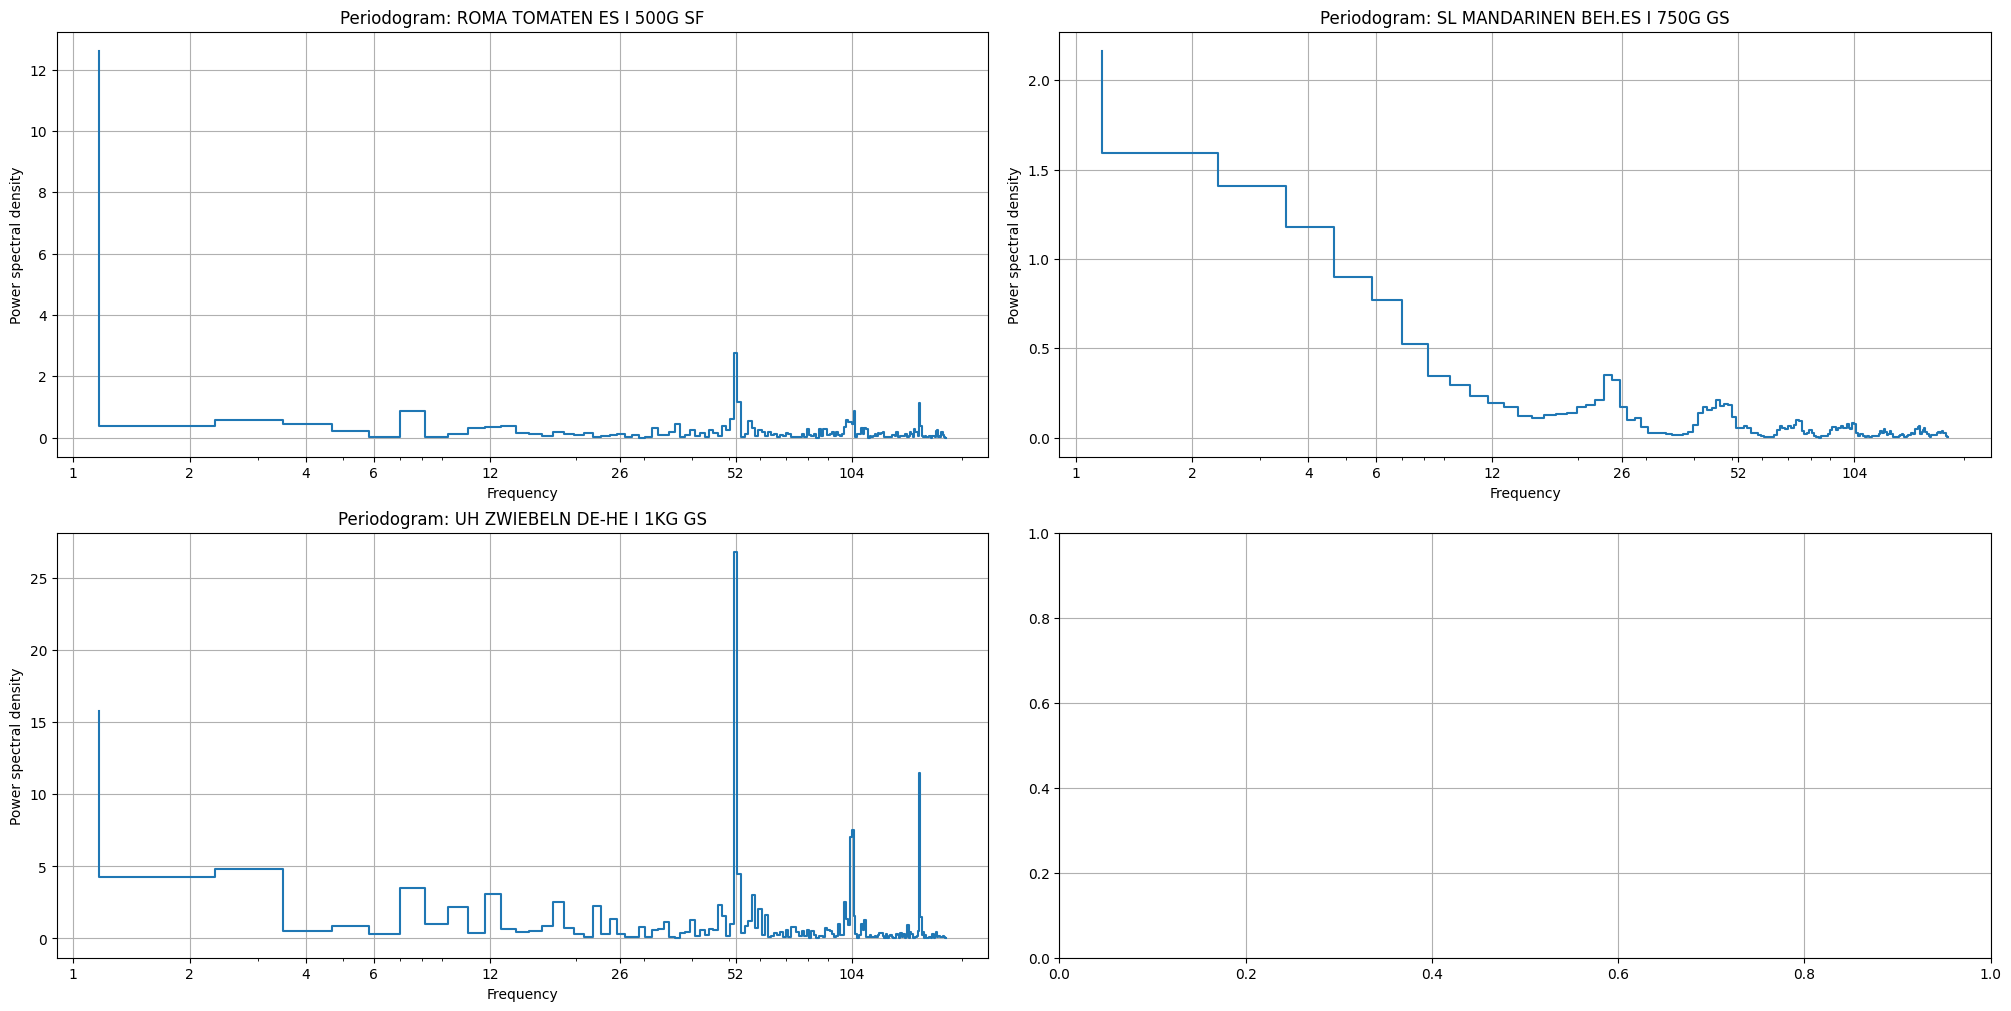

In [349]:
plot_periodogram(ts, period=365.2425, amplitude_aggregation_mode="per-segment", xticks=[1, 2, 4, 6, 12, 26, 52, 104])


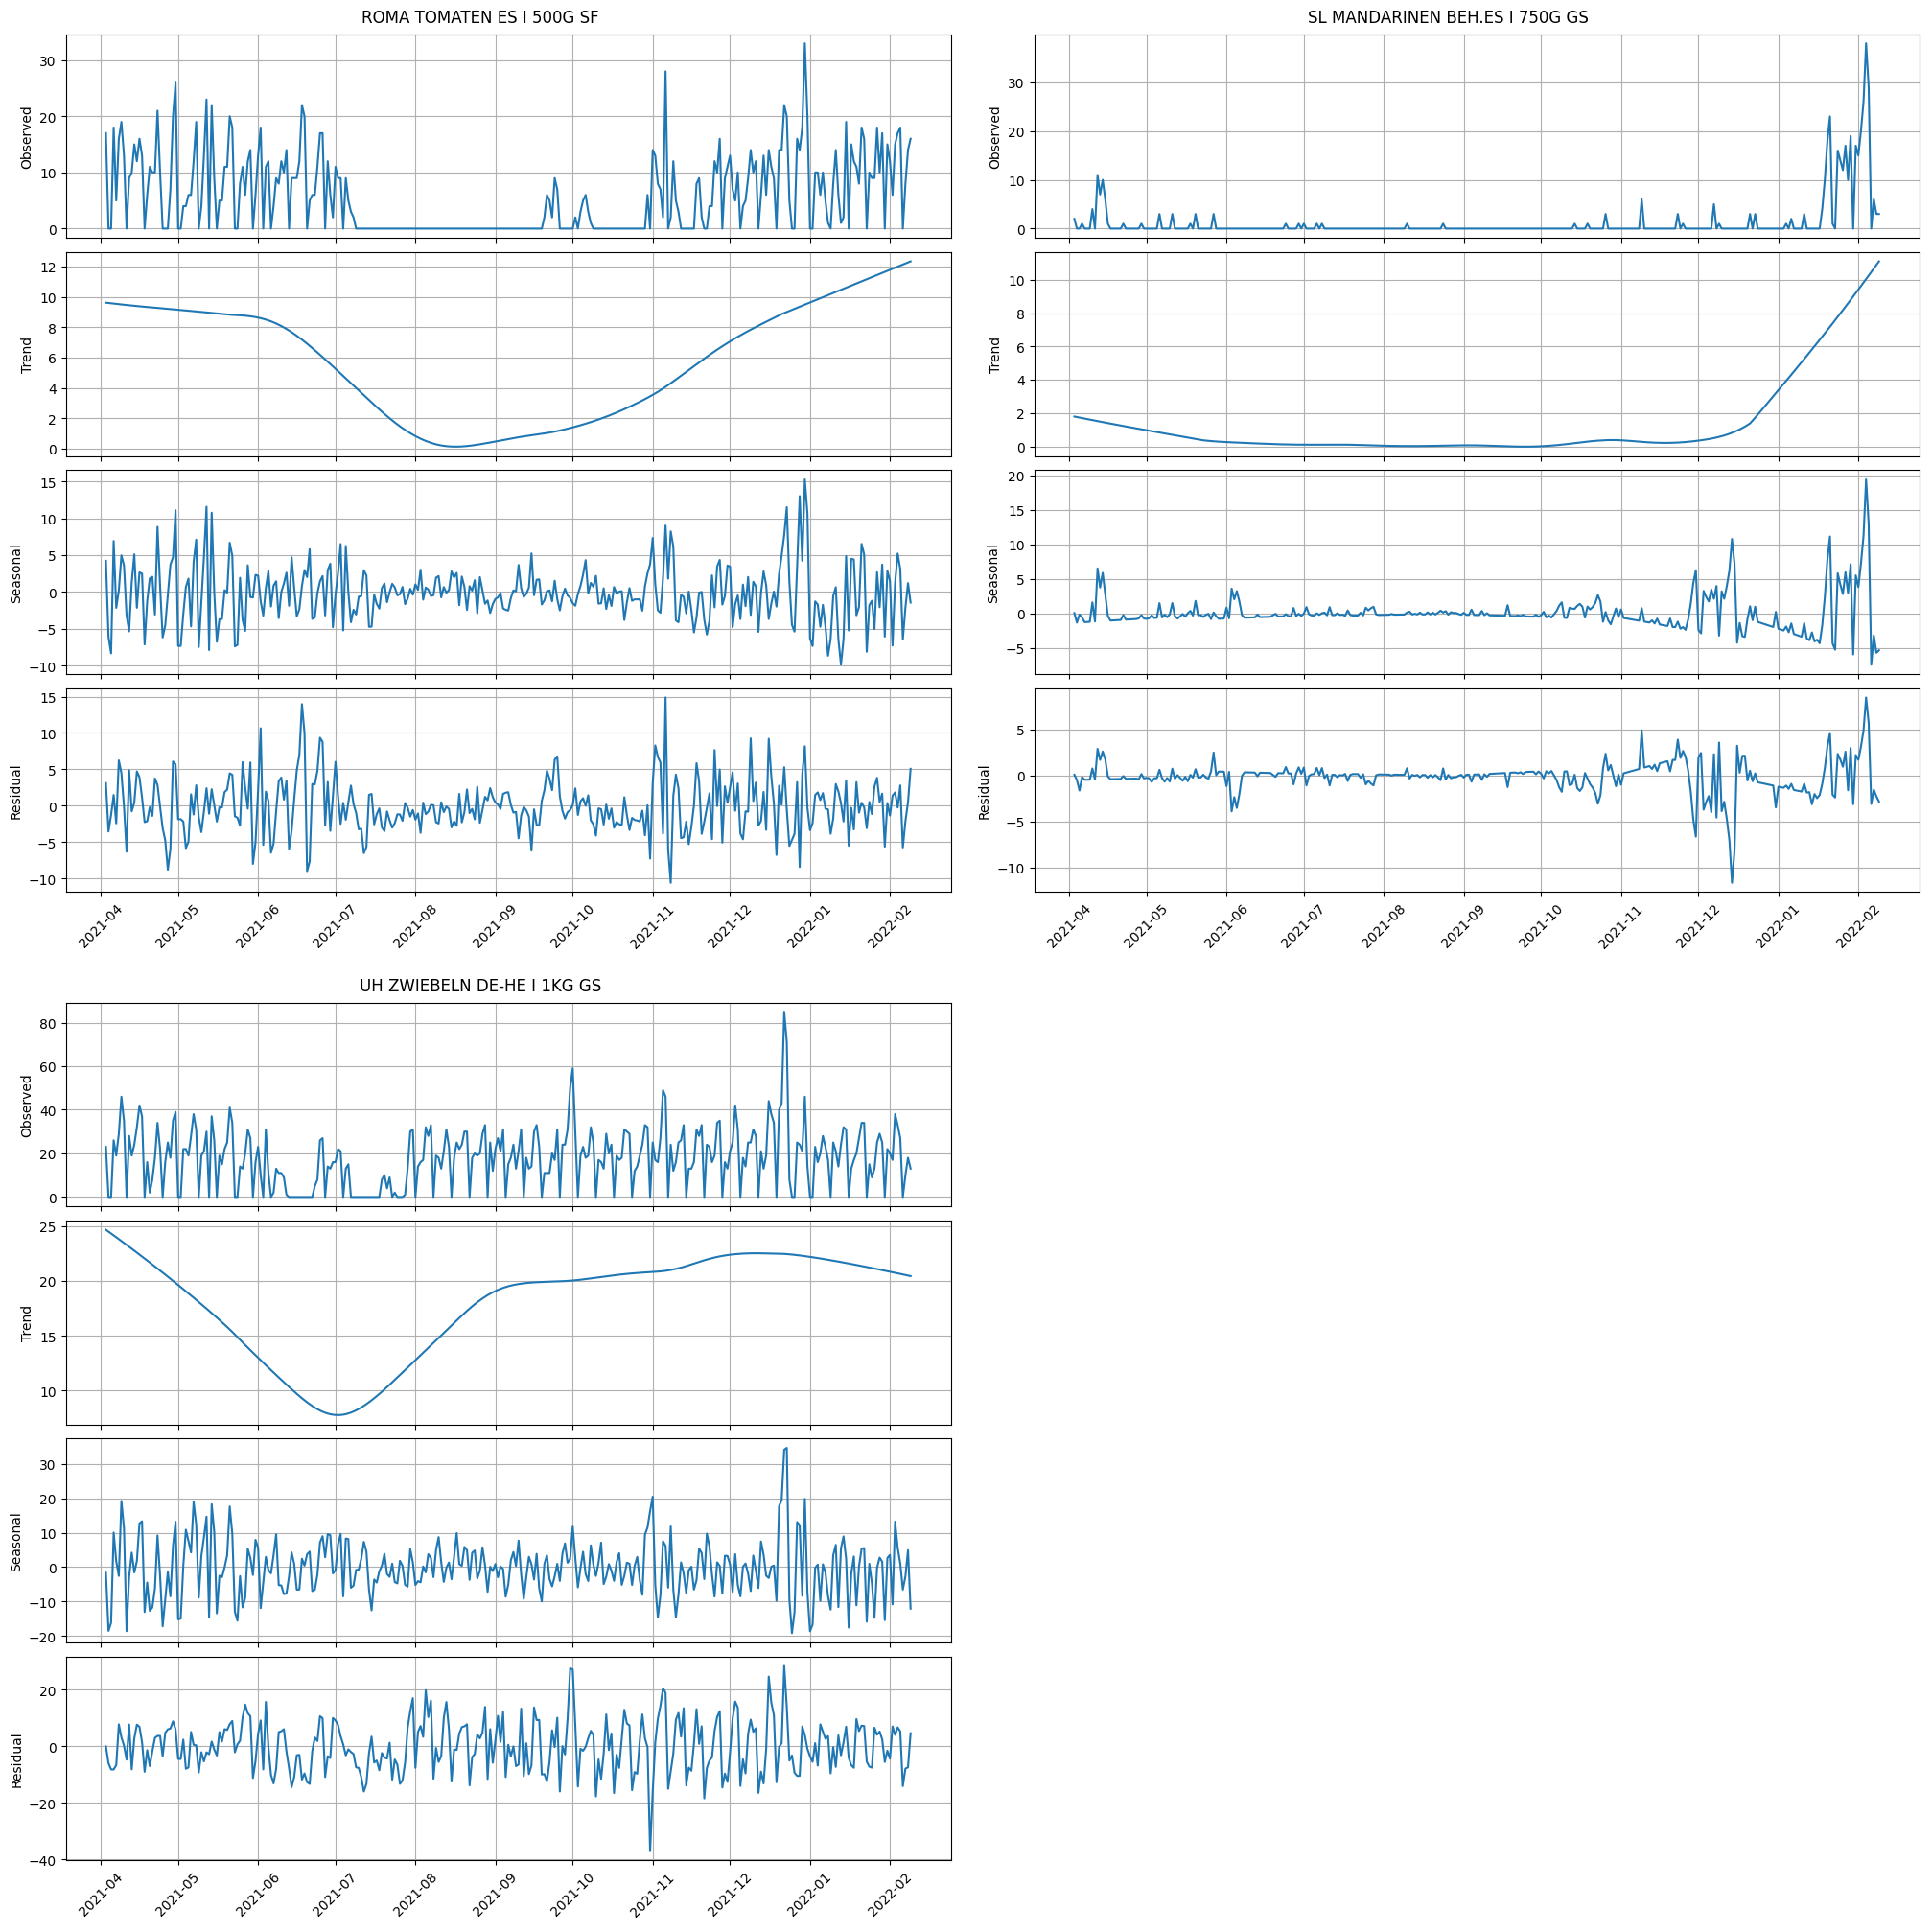

In [350]:
stl_plot(ts=ts, period=52)


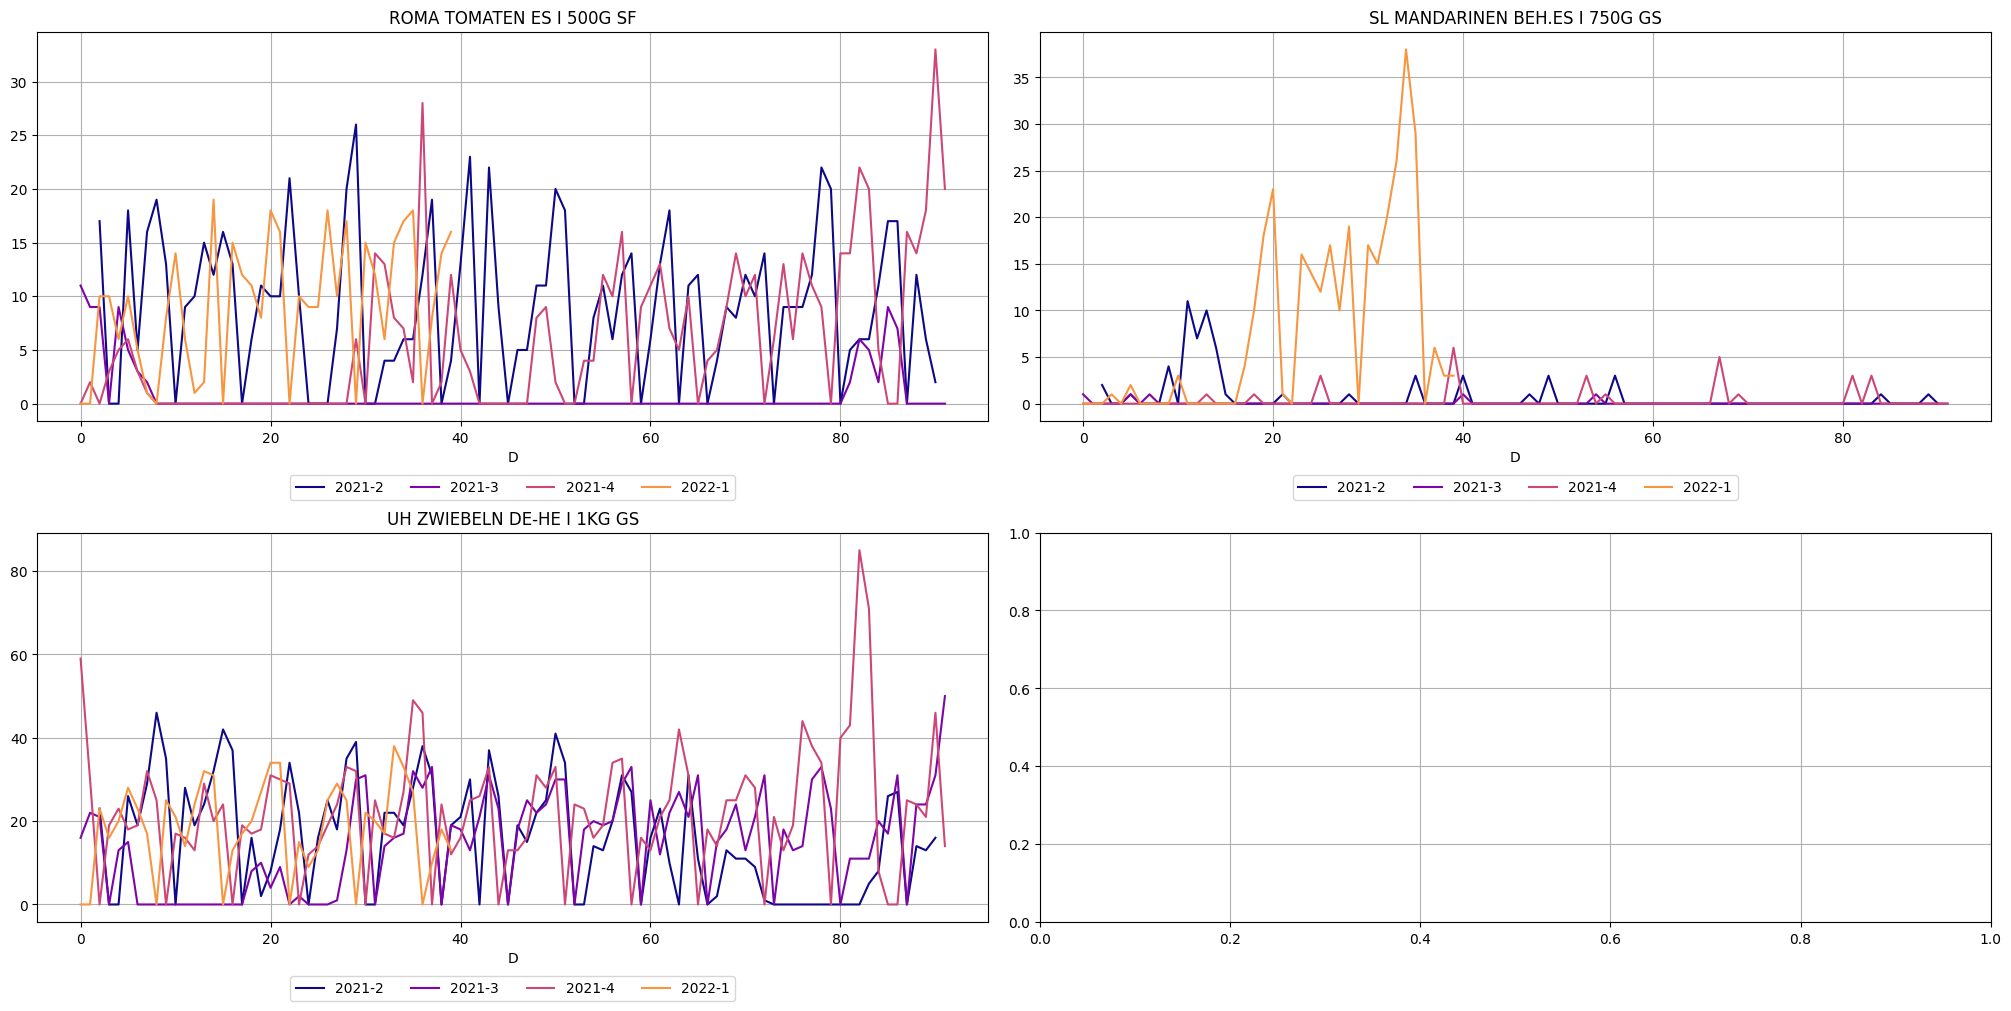

In [351]:
seasonal_plot(ts=ts, cycle="quarter")


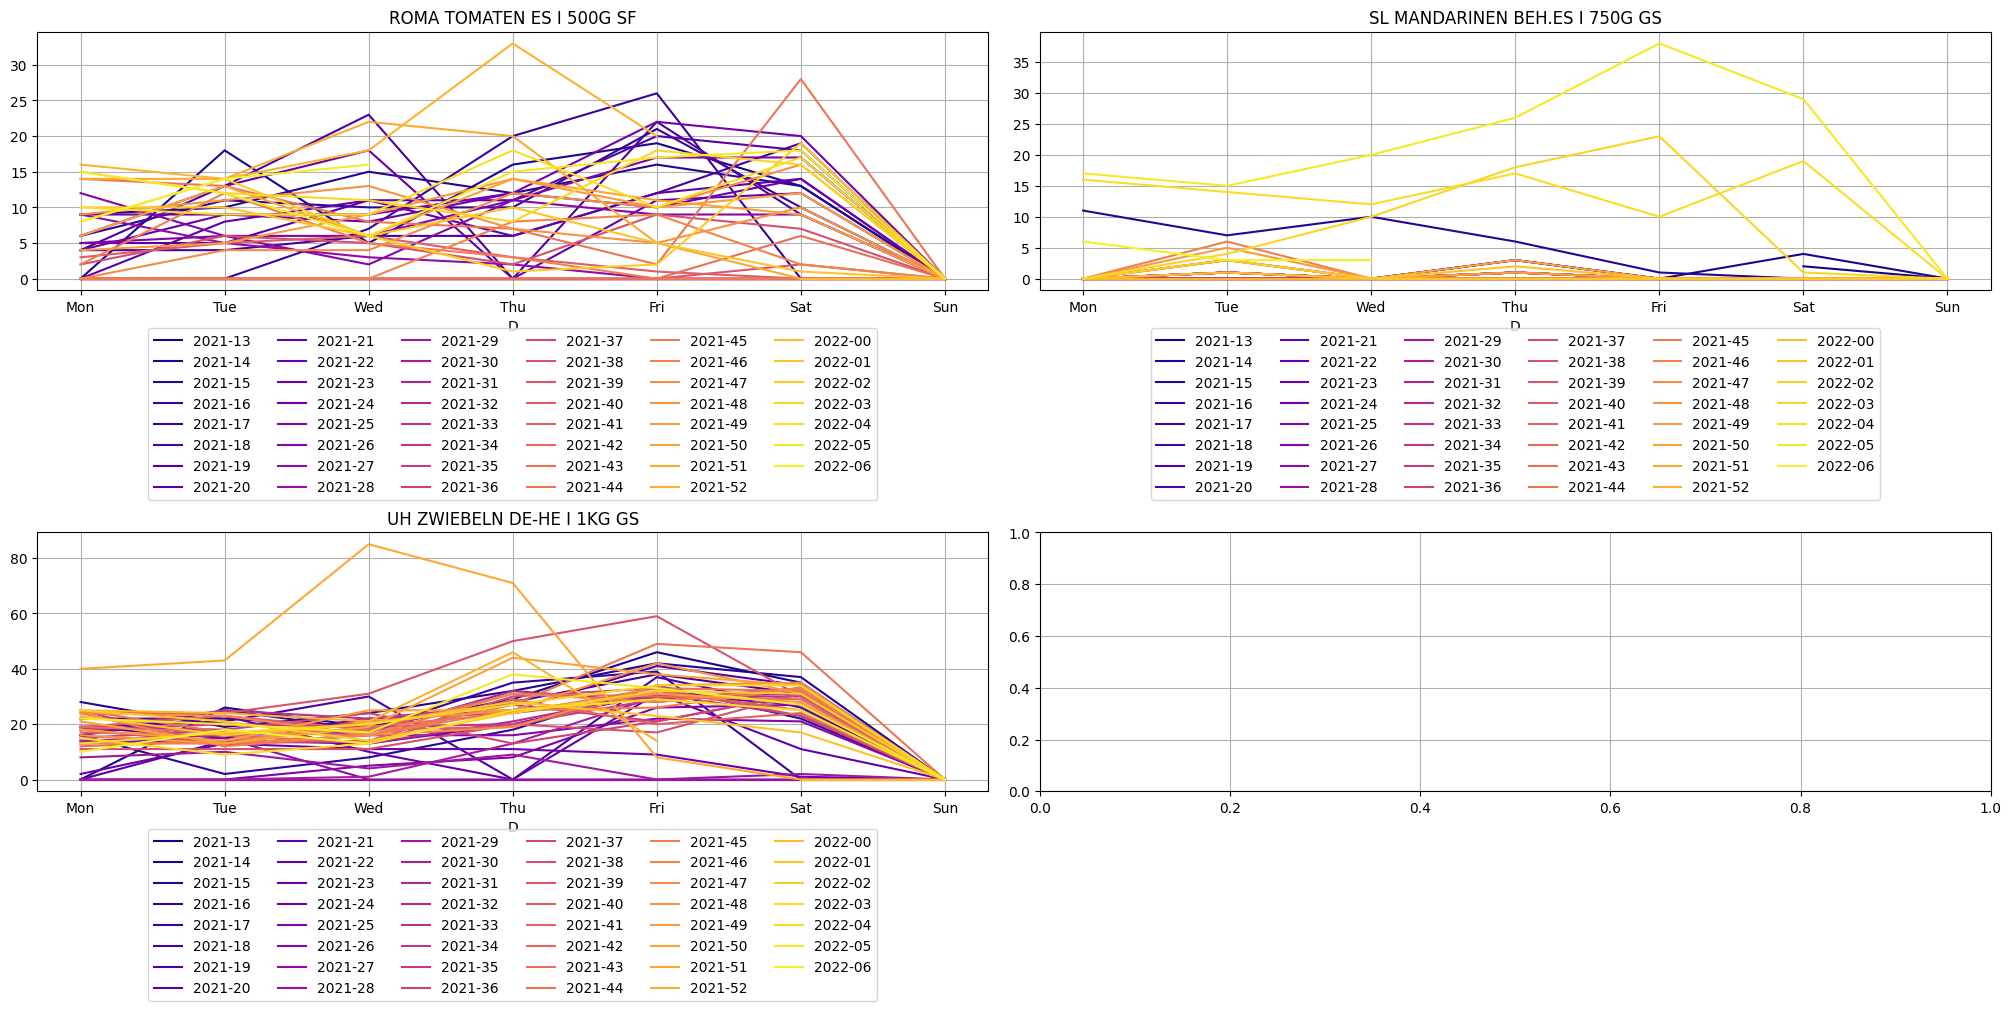

In [352]:
seasonal_plot(ts=ts, cycle="week")


In [353]:
from etna.analysis import plot_time_series_with_change_points, plot_change_points_interactive
from etna.analysis import find_change_points
from ruptures.detection import Binseg


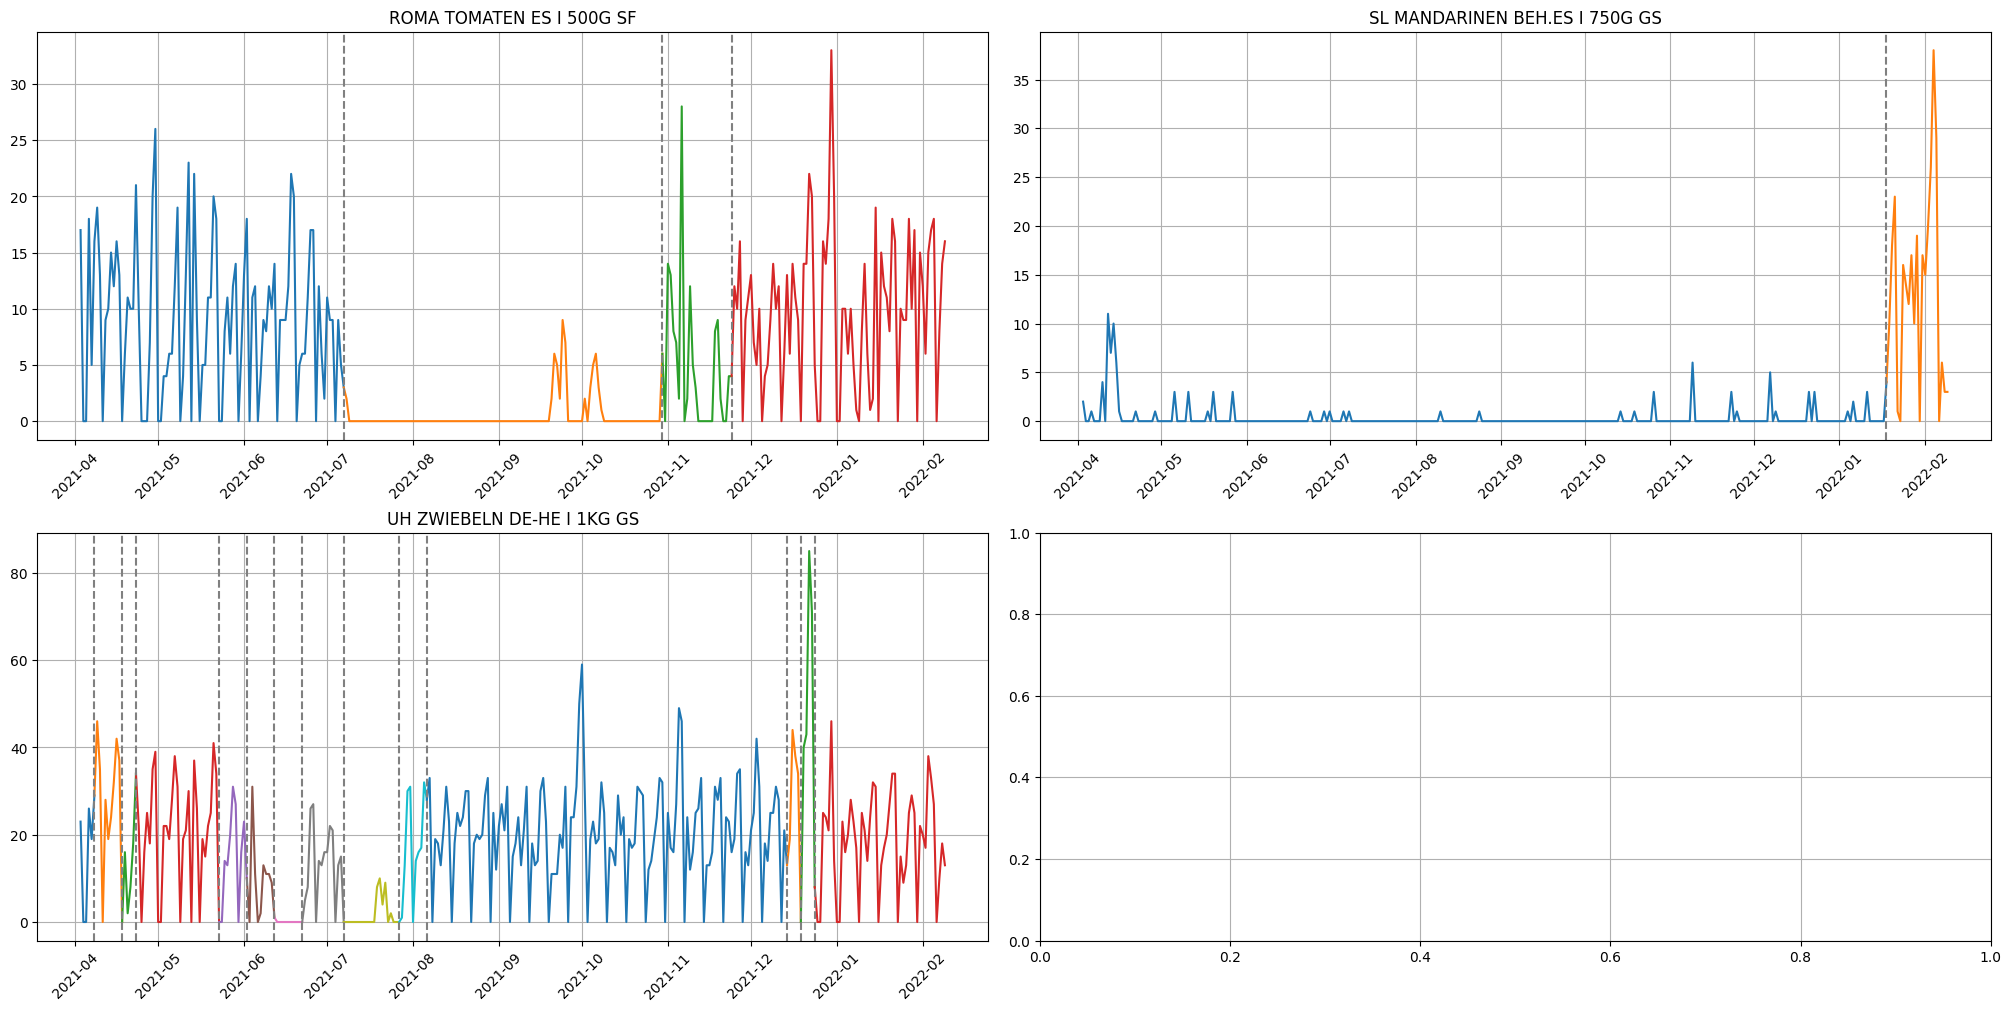

In [354]:
change_points = find_change_points(ts=ts, in_column="target", change_point_model=Binseg(), pen=350)
plot_time_series_with_change_points(ts=ts, change_points=change_points)


# Auto

In [355]:
# from etna.auto import Auto
# from etna.metrics import SMAPE
# import warnings
# warnings.filterwarnings("ignore")

# auto = Auto(
#     target_metric=SMAPE(),
#     horizon=7,
#     experiment_folder="auto-example",
#     transforms=transforms,
# )

# # Get best pipeline
# best_pipeline = auto.fit(ts, catch=(Exception,))
# print(best_pipeline)

In [356]:
# auto.summary()

In [357]:
# auto.summary().iloc[12]['pipeline']#.columns

# Modeling

In [358]:
from etna.models import CatBoostMultiSegmentModel, CatBoostPerSegmentModel, AutoARIMAModel, SklearnPerSegmentModel, ProphetModel, NaiveModel, LinearPerSegmentModel, SeasonalMovingAverageModel

from etna.transforms import (
    MeanTransform,
    LagTransform,
    LogTransform,
    SegmentEncoderTransform,
    DateFlagsTransform,
    LinearTrendTransform,
    HolidayTransform,
    ChangePointsTrendTransform,
)

from etna.metrics import MAE, MSE, SMAPE, RMSE
from etna.pipeline import Pipeline
from etna.analysis import plot_forecast, plot_backtest, plot_residuals, prediction_actual_scatter_plot

In [359]:
lags_list = [1, 2, 3, 4, 5, 6, 7, 14, 21, 28, 35, 42, 49]

In [360]:
transforms = [
    # LogTransform(in_column="target"),
    
    ChangePointsTrendTransform(in_column="target"),
    # LinearTrendTransform(in_column="target"),
    LinearTrendTransform(in_column="target", poly_degree=2),
    
    
    LagTransform(in_column="target", lags=lags_list),
    DateFlagsTransform(
        day_number_in_week=True,
        # day_number_in_month=True,
        # week_number_in_month=True,
        # week_number_in_year=True,
        # month_number_in_year=True,
        # year_number=True,
        special_days_in_week=[4, 5, 6],
    ),
    HolidayTransform(iso_code='DEU'),
    # SegmentEncoderTransform(),
    MeanTransform(in_column="target", window=30),
]


In [361]:
horizon = 1
model = SeasonalMovingAverageModel(window=14, seasonality=7)
# model = LinearPerSegmentModel()
# model = NaiveModel(lag=7)
# model = ProphetModel()
# model = CatBoostMultiSegmentModel()
# model = CatBoostPerSegmentModel()

# m = 7
# q, Q = 1, 2
# p, P = 1, 2
# model = AutoARIMAModel(start_p=p, start_P=P, start_q=q, start_Q=Q, m=m, stationary=True, n_jobs=-1)

pipeline = Pipeline(model=model, transforms=transforms, horizon=horizon)

In [362]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), RMSE(), SMAPE()], n_folds=14, aggregate_metrics=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.2

In [363]:
metrics_df.head().mean()

MAE       6.026920
MSE      67.491523
RMSE      6.026920
SMAPE    59.511677
dtype: float64

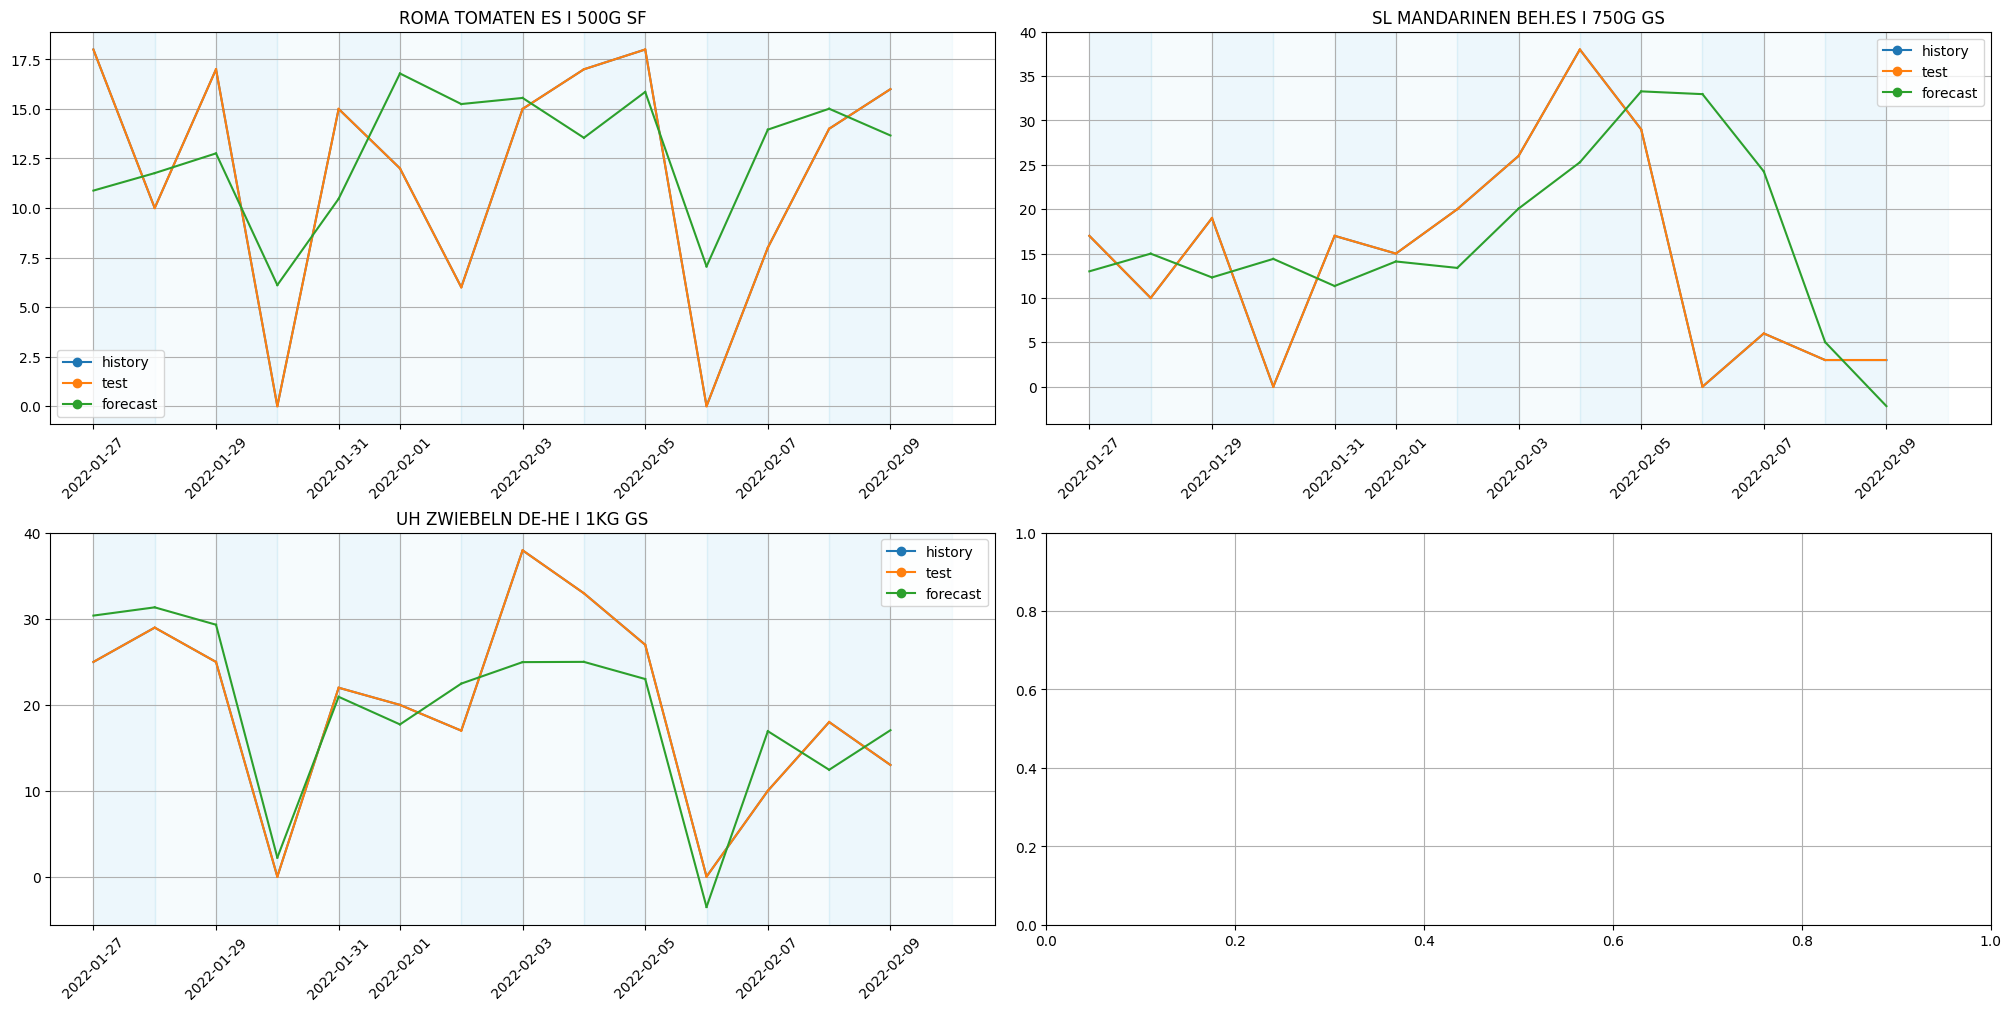

In [364]:
plot_backtest(forecast_df, ts)